Read CSV

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv(r"combined (2020-24 v2).csv")
df = pd.DataFrame(data)

Top 20 universities years 2020-24

In [7]:
data = pd.read_csv(r"combined (2020-24 v2).csv")
df = pd.DataFrame(data)

# Convert the 'year' column to integer type
df['year'] = df['year'].astype(int)

print(df['year'].unique()) # includes 2024

years = df['year'].unique()

# Filter the DataFrame for the years you're interested in
df = df[df['year'].isin(years) & (df['rank'] > 0)]

# Sort the DataFrame based on the 'rank' column
df = df.sort_values(by=['rank'])

# Get the top 20 ranks for each year
top_ranks = df.groupby('year').head(20)

# Print the result
print(top_ranks['year'].unique()) # doesnt include 2024??

[2020 2021 2022 2023 2024]
[2020 2022 2023 2024 2021]


Table for each year with 'rank', 'name', 'scores_teaching'

In [73]:
df_filtered = df[df['year'] == 2022][['rank', 'name', 'scores_teaching']].head(20) # change year to 2020/2021/2022/2023/2024
ts_column = df_filtered['scores_teaching']
df_filtered

,rank,name,scores_teaching
2923,10.0,University of Oxford,91.0
2924,20.0,California Institute of Technology,93.6
2925,30.0,Harvard University,94.5
2926,40.0,Stanford University,92.3
2927,50.0,University of Cambridge,90.9
2928,60.0,Massachusetts Institute of Technology,90.9
2929,70.0,Princeton University,89.5
2930,80.0,"University of California, Berkeley",85.7
2931,90.0,Yale University,90.7
2932,100.0,The University of Chicago,87.2


Getting Sum, Avg, Median, Mode, Std deviation

In [45]:
print(
    ts_column.sum(),
    ts_column.mean(),
    ts_column.median(),
    ts_column.mode().iloc(0),
    ts_column.std()
)

1715.6 85.78 85.6 <pandas.core.indexing._iLocIndexer object at 0x00000238FC8F5770> 5.75157644293696


Calculate average teaching score for each year

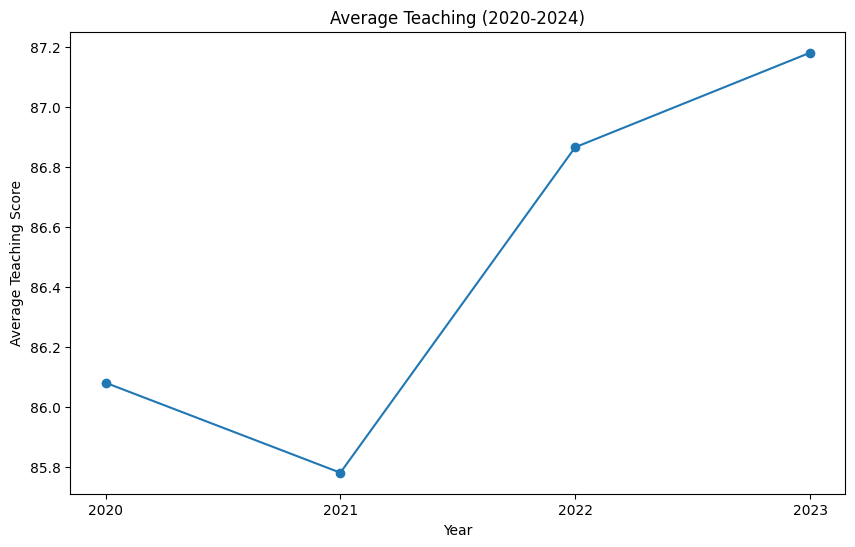

In [66]:
# Calculate average teaching score for each year
average_teaching_score_per_year = top_ranks.groupby('year')['scores_teaching'].mean()

# Extract years and average teaching scores
years = average_teaching_score_per_year.index.to_numpy()
average_teaching_scores = average_teaching_score_per_year.to_numpy()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, average_teaching_scores, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Teaching Score')
plt.title('Average Teaching (2020-2024)')

# Ensure x-axis labels only show integer years
plt.xticks(years)

plt.show()

In [67]:
# Get a list of all unique university names
uni_names = top_ranks['name'].unique()

# Print the list of university names
print(uni_names)

['University of Oxford' 'California Institute of Technology'
 'Stanford University' 'Harvard University' 'University of Cambridge'
 'Massachusetts Institute of Technology' 'Princeton University'
 'University of California, Berkeley' 'Yale University'
 'The University of Chicago' 'Imperial College London'
 'Columbia University' 'University of Pennsylvania'
 'Johns Hopkins University' 'ETH Zurich'
 'University of California, Los Angeles' 'UCL' 'Tsinghua University'
 'Peking University' 'University of Toronto' 'Cornell University'
 'National University of Singapore' 'Duke University']


In [68]:
average_scores = top_ranks.groupby(["name", "year"])["scores_teaching"].mean().unstack()
average_scores

year,2020,2021,2022,2023
name,,,,
California Institute of Technology,92.1,92.5,93.6,90.9
Columbia University,85.6,85.1,87.8,89.4
Cornell University,79.7,78.8,NaN,80.2
Duke University,82.4,80.7,NaN,NaN
ETH Zurich,81.8,80.4,81.3,82.6
Harvard University,89.2,94.4,94.5,94.8
Imperial College London,84.5,82.3,81.4,82.8
Johns Hopkins University,81.7,81.6,80.0,79.4
Massachusetts Institute of Technology,90.5,90.7,90.9,90.7


In [33]:
import pandas as pd
data = pd.read_csv(r'clean-v1.csv')

average_scores = data.groupby(["rank", "year"])["scores_teaching"].mean().unstack()
average_scores

year,2020,2021,2022,2023,2024
rank,,,,,
1,90.5,91.3,91.00,92.30,96.6
10,84.5,88.9,87.20,82.80,94.0
11,87.5,82.3,87.80,NaN,87.6
12,81.7,81.6,81.40,NaN,95.3
13,NaN,85.4,NaN,86.50,89.6
14,NaN,80.4,NaN,86.00,95.6
15,77.8,82.5,81.30,79.40,84.4
16,85.6,76.6,NaN,90.10,87.7
17,83.1,85.1,NaN,92.50,88.6


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Assuming your data is in a CSV file named 'data.csv'
df = pd.read_csv(r'clean-v1.csv')


# Assuming df is your DataFrame
summed_values = df.groupby(by="name", as_index=False).sum(numeric_only=True)

universities = summed_values["name"].values
teaching_scores = summed_values["scores_teaching"].values
years = summed_values["year"].values


fig.add_trace(
    go.Scatter(
        x=universities,
        y=teaching_scores,
        yaxis="y2",
        name="Teaching Score",
        marker=dict(color="crimson"),
    )
)

fig.update_layout(
    legend=dict(orientation="h"),
    yaxis=dict(
        title=dict(text="Year"),
        side="left",
    ),
    yaxis2=dict(
        title=dict(text="Teaching Score"),
        side="right",
        overlaying="y",
        tickmode="sync",
    ),
)

fig.show() #### wrong values for year and score

NameError: name 'fig' is not defined